## Supreme Court Project Guide


Outputs for Supreme Court project: State or country, geometry, color.


The ultimate goal of this project is to build a database of Supreme Court cases for 2016 that includes the dialogue from the oral arguments of each case. As we have seen in class the arguments were scraped from this page: https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx 

I have already downloaded and transformed the PDFs of the transcripts into text documents which you can download from courseworks: supreme_court_pdfs_txt.zip

There are three steps that you need to complete:

**Please note:** Step 3 is the most challenging--if you want to spend some time coding, you can skip Steps 1 and 2 and get to work on Step 3

**STEP 1:** scrape all of the case information available on this page: https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx 

This should include case name, docket number, etc--and most importantly the name of the PDF file. All of the text files share the exact same name as the PDF files they came from. This file name will allow you to connect your transcription data with your case data. 

It is up to you what kind Data structure you want to build. But it likely to be a list of lists, or list of dictionaries--for each case you will have a list or dictionary of the information you scrape from the webpage.

**STEP 2:** find a secondary source to scrape/integrate with your case data. The information on the Supreme Court page is very limited. You need to find a source or group of sources that ad information. The most important information would likely be: the decision, who voted for and against, and the state of origin of the case (for geocoding). You might think of other great things to put in there too! This information needs to be merged with the data you have from STEP 2.

**STEP 3:** use regular expressions to clean up and parse the text files so that you have a searchable data structure containing the dialog from the transcripts. 

From a data architecture perspective, you probably want to have a separate list for each case and in each list a data structure that pairs the speaker with what she/he says. Like:

`[['MR. BERGERON'," Yes. That's essentially the same thing"],[ 'JUSTICE SOTOMAYOR',' So how do you deal with Chambers?']]`

This is a list of lists --it could also be a list of dictionaries if you want it to be. The real programmatic challenge here is to clean up the text files and parse them successfully. Most of the instructions below are devoted to this, but Steps 1 and 2 are also extremely important.

Go step-by-step through this, and email me whenever you get stuck, and I will help. If you complete all the steps before Tuesday, email me if you want to go further.



### STEP 1
Scrape all of the necessary information from:

https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx 

You should result and a list of dictionaries for each case.

In [1]:
# Import scraping libraries
import pandas as pd
import re
from bs4 import BeautifulSoup
import requests
response = requests.get('https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx')
doc = BeautifulSoup(response.text, 'html.parser')

In [2]:
# Write scraping code here

# name before .pdf -- 16-399_3f14 (match results to the case)
# case name
# case number

# Case name, docket number, etc--and most importantly the name of the PDF file. 
# All of the text files share the exact same name as the PDF files they came from. 
# This file name will allow you to connect your transcription data with your case data.
# It is up to you what kind Data structure you want to build. 
# But it likely to be a list of lists, or list of dictionaries--
# for each case you will have a list or dictionary of the information you scrape from the webpage.


table = doc.find("table", class_='table datatables')
rows = table.find_all('tr')

case_data = []

for item in rows:
    
    all_data = {}
    
    case_name = item.find('span') # case names
    
    case_id = item.find_all('td')[0].find('a') # case id
    
#     for a in doc.find_all('td')[0].find('a', href=True):
#         case_id = a['href'].split('/')
#         case_id[-1]
        
        
        # href="argument_transcripts/2016/16-399_3f14.pdf"
        
    docket_number = item.find_all('td')[0].find(target="_blank") # prints a href with .pdf file name and case number 
    
    all_data['date_argued'] = item.find_all('td')[1].text.strip() # gets the date
    
    
    if case_name:
        all_data['case_name'] = case_name.string
    if case_id:
        this_file = case_id['href'].split('/')[-1]
        all_data['case_id'] = this_file.split('.')[0]
        
    
    if  docket_number: 
        all_data['docket_number'] = docket_number.string.replace('.', '').strip()  
        case_data.append(all_data)
case_data


[{'case_id': '16-399_3f14',
  'case_name': 'Perry v. Merit Systems Protection Bd.',
  'date_argued': '04/17/17',
  'docket_number': '16-399'},
 {'case_id': '16-605_2dp3',
  'case_name': 'Town of Chester v. Laroe Estates, Inc.',
  'date_argued': '04/17/17',
  'docket_number': '16-605'},
 {'case_id': '16-373_4e46',
  'case_name': "California Public Employees' Retirement System v. ANZ Securities, Inc.",
  'date_argued': '04/17/17',
  'docket_number': '16-373'},
 {'case_id': '16-529_21p3',
  'case_name': 'Kokesh v. SEC',
  'date_argued': '04/18/17',
  'docket_number': '16-529'},
 {'case_id': '16-349_e29g',
  'case_name': 'Henson v. Santander Consumer USA Inc.',
  'date_argued': '04/18/17',
  'docket_number': '16-349'},
 {'case_id': '15-577_l64n',
  'case_name': 'Trinity Lutheran Church of Columbia, Inc. v. Comer',
  'date_argued': '04/19/17',
  'docket_number': '15-577'},
 {'case_id': '16-240_nkp1',
  'case_name': 'Weaver v. Massachusetts',
  'date_argued': '04/19/17',
  'docket_number': '

In [3]:
df = pd.DataFrame(case_data)
df.shape

(64, 4)

In [4]:
df.head()

,case_id,case_name,date_argued,docket_number
0,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399
1,16-605_2dp3,"Town of Chester v. Laroe Estates, Inc.",04/17/17,16-605
2,16-373_4e46,California Public Employees' Retirement System...,04/17/17,16-373
3,16-529_21p3,Kokesh v. SEC,04/18/17,16-529
4,16-349_e29g,Henson v. Santander Consumer USA Inc.,04/18/17,16-349


In [5]:
# gives all the IDs and sorts them in order

# https://chrisalbon.com/python/pandas_list_unique_values_in_column.html

array = df['case_id'].unique()
array.sort()
array

array(['14-1055_h3dj', '14-1538_j4ek', '14-9496_feah', '15-1031_6647',
       '15-1039_bqm1', '15-1111_ca7d', '15-1189_6468', '15-118_3e04',
       '15-1191_igdj', '15-1194_0861', '15-1204_k536', '15-1248_2dq3',
       '15-1251_q86b', '15-1256_d1o2', '15-1262_l537', '15-1293_o7jp',
       '15-1358_7648', '15-1391_5315', '15-1406_d1of', '15-1498_m647',
       '15-1500_5g68', '15-1503_3f14', '15-214_l6hn', '15-423_pnk0',
       '15-457_gfbh', '15-497_4g15', '15-513_k5fm', '15-537_ljgm',
       '15-577_l64n', '15-5991_21p3', '15-606_5iel', '15-628_p86a',
       '15-649_l5gm', '15-680_n648', '15-7250_3eah', '15-777_1b82',
       '15-797_f2q3', '15-8049_4f15', '15-827_gfbh', '15-8544_c1o2',
       '15-866_j426', '15-9260_bq7c', '15-927_6j37', '16-142_4gc5',
       '16-149_bodg', '16-240_nkp1', '16-254_7lio', '16-309_b97c',
       '16-327_d18e', '16-32_mlho', '16-341_8njq', '16-348_2cp3',
       '16-349_e29g', '16-369_8nka', '16-373_4e46', '16-399_3f14',
       '16-405_9olb', '16-466_4g15', 

### STEP 2 
Scrape the additional source(s)

For this you need to do research and try to find a source that will give you useful information that you can add to the dictionary you created in Step 1.

In [6]:
#Code away!

# https://docs.google.com/spreadsheets/d/1KMaTLQl2as2WQwzvvbnqPK3yIeuTRQkWYCHUiB3b0UE/edit#gid=0


### STEP 3
Here we go: the text files that were extracted from the PDFs are quite messy, you do not need to get them perfect, but you need to clean them up enough so that you can zone in on the arguments themselves. Below I take you step-by-step through what you need to do. In the end you want to have a separate list for each case that contains the speaker and the dialogue attached to that speaker.

**Step 1:** Download the text files from courseworks
Make sure they are locally on your computer. 
Open up the text files in a text editor like sublime, and carefully look at the problems with the files. How will you clean this up?

**Step 2:** Eventually you will want to loop through all of the text files and run the cleanup on all of them. But first just select one text file to open up and begin cleaning up.

In [7]:
#Import the regular expression library
import re

In [8]:
#Open a text file from your computer
f = open('/Users/mukhtaribrahim/Desktop/ledeprogram/databases/pdfs/15-777_1b82.txt', 'r')
sample_transcript = f.read()

In [9]:
#Take a look at the text file
sample_transcript

'Official - Subject to Final Review\n1 1 IN THE SUPREME COURT OF THE UNITED STATES\n\n2 -----------------x\n\n3 SAMSUNG ELECTRONICS CO.,\n\n:\n\n4 LTD., ET AL.,\n\n:\n\n5\n\nPetitioners\n\n: No. 15-777\n\n6 v.\n\n:\n\n7 APPLE, INC.,\n\n:\n\n8\n\nRespondent.\n\n:\n\n9 -----------------x\n\n10 Washington, D.C.\n\n11 Tuesday, October 11, 2016\n\n12\n\n13 The above-entitled matter came on for oral\n\n14 argument before the Supreme Court of the United States\n\n15 at 10:05 a.m.\n\n16 APPEARANCES:\n\n17 KATHLEEN M. SULLIVAN, ESQ., New York, N.Y.; on behalf of\n\n18 the Petitioners.\n\n19 BRIAN H. FLETCHER, ESQ., Assistant to the Solicitor\n\n20 General, Department of Justice, Washington, D.C.;\n\n21 for United States, as amicus curiae, supporting\n\n22 neither party.\n\n23 SETH P. WAXMAN, ESQ., Washington, D.C.; on behalf of the\n\n24 Respondent.\n\n25\n\nAlderson Reporting Company\n\n\x0cOfficial - Subject to Final Review\n1 CONTENTS 2 ORAL ARGUMENT OF 3 KATHLEEN M. SULLIVAN, ESQ. 4 On beha

**How in the world are you going to clean this up?**
Take a close look and think about first what needs to be removed, and then needs to be isolated. You'll probably need the combination of regular expression (especially using subs() -- which is a regex replace), and simple splits -- where you split the text that point, and just keep the part of the text that you want. If you want to figure this on your own don't read any further--if you're starting to get stuck go a few cells down, and follow my hints.

Also take a look at the hint below--it might come in very handy...


In [10]:
#A note on regex splits:
# look at the difference between regex1 regex2
#A split using groups keeps the groups!!!!

string = "Tomorrow and tomorrow and tomorrow"
regex1 = r"and" #not grouped
regex2 = r"(and)" #grouped
re.split(regex2,string)

['Tomorrow ', 'and', ' tomorrow ', 'and', ' tomorrow']

### Cleaning comes first

A step-by-step way of Cleaning up this mess.

Step 1. You might notice that every page has:

`Alderson Reporting Company

Official - Subject to Final Review`
 
You want to get rid of that. I would use a regex sub() 

Step 2. **Line Numbers:** you might also notice these annoying line numbers going from 1 - 25 everywhere: I would use the regex sub() to get rid of this too -- but be very careful, you don't want to get rid of all the numbers in there. The cleaning doesn't have to be perfect, but try to get as many of them as you can without deleting other numbers.

Step 3 and 4. **chop off the beginning/ chop off the end**: now it would be very helpful to get rid of all of the text that comes before the arguments begins, and all the text that comes after the argument (each page has a really annoying index at the end that you don't want to be searching through). Look for words or phrases that uniquely repeat at the beginning and at the end of the arguments. The easiest way to isolate this, to do a simple split() on one of those phrases, and keep the half of The split you want. (Am I being too cryptic here?--a good split should give you list with two elements when you want to keep one of them) Think about it and email me.

Try to get these 4 cleaning actions to work step-by-step in the 4 cells below. As you go, I would assign each cleaner version of the text to a new variable. 

In [11]:
# chop off the beginning before the dialogue begins

# remove_beg = re.split(r"PROCEEDINGS", sample_transcript)
# remove_beg[1]


In [12]:
# chop off the end after the dialogue ends

# remove_end = re.split(r"\(Whereupon", remove_beg[1])
# remove_end[1]

In [13]:
# remove Alderson company stuff

# remove_alderson = re.sub(r"Alderson Reporting Company|Official - Subject to Final Review", "", remove_end[0])
# remove_alderson

In [14]:
# remove numbers 1 - 25

# clean_data1 = re.sub(r"[\n ][12]?\d ", " ", remove_alderson)
# clean_data1

In [15]:
# check new variable to make sure it is clean

# clean_data2 = re.sub(r"\n\n\n\x0c|\n\n\n\n\x0c|\n\n\n\n\x0c\n|\n", " ", clean_data1)
# clean_data2

In [16]:
# clean data more by removing additional numbers

# remove_nums = re.sub(r" \d ", "", clean_data2)
# remove_nums

In [17]:
# remove_argument = re.sub(r"\w+ ARGUMENT [^a-z]+ (PETITIONER|RESPONDENT)S?", "", remove_nums)
# remove_argument

In [18]:
# removing time before CHIEF JUSTICE ROBERTS

# remove_time = re.split(r"([A-Z.\s]+:)", remove_argument)
# remove_time[1:]

### Get your dialogue list
Now this transcription should be clean enough to get a list with every speaker, and what the speaker said. The pattern for the speakers is fairly obvious--my recommendation is to do a split using groups (like the example I show above with "tomorrow and tomorrow").

If you write your regular expression correctly: you should get a single list in which each element is either a speaker, or what was said.

In [19]:
# get a list of speaker and speech

# speech1 = re.split(r"([A-Z.\s]{8,}):", remove_nums)
# speech1

# speech1 = re.split(r"([A-Z.\s]+:)", remove_nums)
# speech1

# speech1 = remove_time[1:]
# speech1

In [20]:
# remove ORAL ARGUMENT OF KATHLEEN M. SULLIVAN ON BEHALF OF THE PETITIONERS

# \w+ ARGUMENT [^a-z]+ (PETITIONER|RESPONDENT)S?

# speech1[2] = re.sub(r"\.\s[A-Z.\s]{67}", "", speech1[2])
# speech1


In [21]:
# remove . REBUTTAL ARGUMENT OF KATHLEEN M. SULLIVAN ON BEHALF OF THE PETITIONERS

# speech1[-24] = re.sub(r"\.\s[A-Z.\s]{71}", "", speech1[-24])
# speech1

### Make it a list of pairs
If you got your list the way I recommended to, it is just single list with elements after element--you need to figure out how to change it so you pair the speaker with what is said. Give it some thought, there are a few ways to try to do this. If you made it this far, you're doing great!

In [22]:
# speech2 = list(zip(speech1[0::2], speech1[1::2]))
# speech2

In [23]:
# import pandas as pd
# col_names = ['speaker','words']
# df = pd.DataFrame.from_records(speech2, columns=col_names)
# df.head()

In [24]:
# df['docket'] = '15-777'
# df.head()

In [25]:
remove_beg = re.split(r"PROCEEDINGS", sample_transcript)
remove_end = re.split(r"\(Whereupon", remove_beg[1])
remove_alderson = re.sub(r"Alderson Reporting Company|Official - Subject to Final Review", "", remove_end[0])
clean_data1 = re.sub(r"[\n ][12]?\d ", " ", remove_alderson)
clean_data2 = re.sub(r"\n\n\n\x0c|\n\n\n\n\x0c|\n\n\n\n\x0c\n|\n", " ", clean_data1)
remove_nums = re.sub(r" \d ", "", clean_data2)
# remove_argument = re.sub(r"\w+ ARGUMENT [^a-z]+ (OF|PETITIONER|RESPONDENT)S?|^SUPPORTING (NEITHER|REVERSAL)S?", "", remove_nums)
remove_argument = re.sub(r"SUPPORTING (NEITHER|REVERSAL|VACATUR)S?|THE APPELLANTS|THE APPELLEES|THE COURT|\w+ ARGUMENT [^a-z]+ (OF|PETITIONER|RESPONDENT)S?", "", remove_nums)
remove_time = re.split(r"([A-Z.\s]+:)", remove_argument)
speech1 = remove_time[1:]
speech2 = list(zip(speech1[0::2], speech1[1::2]))
speech2
# iterating thro the 0 and 1 element 
# taking 0 and 1 element and joining them in a tuple


[(' CHIEF JUSTICE ROBERTS:',
  " We'll hear argument first this morning in Case No. 15-777, Samsung Electronics v. Apple, Incorporated. Ms. Sullivan"),
 ('.  MS. SULLIVAN:',
  ' Mr. Chief Justice, and may it please the Court: A smartphone is smart because it contains hundreds of thousands of the technologies that make it work. But the Federal Circuit held that Section 289 of the Patent Act entitles the holder of a single design patent on a portion of the appearance of the phone to total profit on the entire phone. That result makes no sense. A single design patent on the portion of the appearance of a phone should not entitle the design-patent holder to all the profit on the entire phone. Section 289 does not require that result, and as this case comes to the Court on the briefing, Apple and the government now agree that Section 289 does not require that result. We respectfully ask that the Court hold that when a design patent claims a design that is applied to a component of a phone o

In [26]:
def supreme_text(thelines):
    
    remove_beg = re.split(r"PROCEEDINGS", thelines)
    remove_end = re.split(r"above-entitled", remove_beg[1])
    remove_alderson = re.sub(r"Alderson Reporting Company|Official - Subject to Final Review", "", remove_end[0])
    clean_data1 = re.sub(r"[\n ][12]?\d ", " ", remove_alderson)
    clean_data2 = re.sub(r"\n\n\n\x0c|\n\n\n\n\x0c|\n\n\n\n\x0c\n|\n", " ", clean_data1)
    remove_nums = re.sub(r" \d ", "", clean_data2)
#     remove_argument = re.sub(r"\w+ ARGUMENT [^a-z]+ (OF|PETITIONER|RESPONDENT)S?|^SUPPORTING (NEITHER|REVERSAL)S?)", "", remove_nums)
    remove_argument = re.sub(r"SUPPORTING (NEITHER|REVERSAL|VACATUR)S?|THE APPELLANTS|THE APPELLEES|THE COURT|\w+ ARGUMENT [^a-z]+ (OF|PETITIONER|RESPONDENT)S?", "", remove_nums)
    remove_time = re.split(r"([A-Z.\s]+:)", remove_argument)
    speech1 = remove_time[1:]
    speech2 = list(zip(speech1[0::2], speech1[1::2]))
    
    return speech2

In [27]:
supreme_text(sample_transcript)

[(' CHIEF JUSTICE ROBERTS:',
  " We'll hear argument first this morning in Case No. 15-777, Samsung Electronics v. Apple, Incorporated. Ms. Sullivan"),
 ('.  MS. SULLIVAN:',
  ' Mr. Chief Justice, and may it please the Court: A smartphone is smart because it contains hundreds of thousands of the technologies that make it work. But the Federal Circuit held that Section 289 of the Patent Act entitles the holder of a single design patent on a portion of the appearance of the phone to total profit on the entire phone. That result makes no sense. A single design patent on the portion of the appearance of a phone should not entitle the design-patent holder to all the profit on the entire phone. Section 289 does not require that result, and as this case comes to the Court on the briefing, Apple and the government now agree that Section 289 does not require that result. We respectfully ask that the Court hold that when a design patent claims a design that is applied to a component of a phone o

### Loop through all texts
If you made it this far--congratulations! 
The only thing left is to set up a loop that looks through all the texts and runs the cleanup and parsing when each one. You will need to have completed Step 1 in order to be able to do this loop because you will need the names to PDFs to do it. (Also each final list should also contain the PDF name, so you can reference it from your case database.)

In [28]:
# you could try here--Or email me with questions...

In [29]:
# all_cases = ['14-1538_j4ek', '14-9496_feah']
cases_data = []
path = '/Users/mukhtaribrahim/Desktop/ledeprogram/databases/pdfs/'
for file_name in array:
    print(file_name)
    # bad files
    if file_name != '15-1358_7648' and file_name != '15-577_l64n' and file_name != '15-866_j426' and file_name != '16-32_mlho' and file_name!= '16-466_4g15' and file_name !='16-529_21p3':
        f = open(path + file_name + '.txt', 'r')
        sample_transcript = f.read()
        this_list = supreme_text(sample_transcript)   
        better_list = []
        for each in this_list:
            entry = list(each)
            entry.append(file_name)
            better_list.append(entry)
        this_list.append(file_name)
        cases_data.extend(better_list)

14-1055_h3dj
14-1538_j4ek
14-9496_feah
15-1031_6647
15-1039_bqm1
15-1111_ca7d
15-1189_6468
15-118_3e04
15-1191_igdj
15-1194_0861
15-1204_k536
15-1248_2dq3
15-1251_q86b
15-1256_d1o2
15-1262_l537
15-1293_o7jp
15-1358_7648
15-1391_5315
15-1406_d1of
15-1498_m647
15-1500_5g68
15-1503_3f14
15-214_l6hn
15-423_pnk0
15-457_gfbh
15-497_4g15
15-513_k5fm
15-537_ljgm
15-577_l64n
15-5991_21p3
15-606_5iel
15-628_p86a
15-649_l5gm
15-680_n648
15-7250_3eah
15-777_1b82
15-797_f2q3
15-8049_4f15
15-827_gfbh
15-8544_c1o2
15-866_j426
15-9260_bq7c
15-927_6j37
16-142_4gc5
16-149_bodg
16-240_nkp1
16-254_7lio
16-309_b97c
16-327_d18e
16-32_mlho
16-341_8njq
16-348_2cp3
16-349_e29g
16-369_8nka
16-373_4e46
16-399_3f14
16-405_9olb
16-466_4g15
16-5294_g314
16-529_21p3
16-54_7l48
16-605_2dp3
16-6219_7mio
16-74_p8k0


In [30]:
cases_data

[[' CHIEF JUSTICE ROBERTS:',
  ' We will hear argument next in Case No. 14-1055, Lightfoot v. Cendant Mortgage Corporation. Mr. Rosenkranz',
  '14-1055_h3dj'],
 ['.  MR. ROSENKRANZ:',
  ' Thank you, Mr. Chief Justice, and may it please the Court: There is only one natural way to read the language at issue here. A "court of competent jurisdiction" is a court that has an independent source of subject-matter jurisdiction. That is what this Court has held five times those words mean. So let\'s start with the plain language. The statute grants Freddie, quote, "The power in its corporate name to sue and be sued in any \'court of competent jurisdiction,\' State or Federal." The only reference to jurisdiction in that passage is to say that you don\'t get to go to any Federal court or any State court, but rather, you have to choose a court, State or Federal, that must be a "court of competent jurisdiction." And the only way to find out whether a court is a "court of competent jurisdiction" is t

In [31]:
import numpy as np
import pandas as pd
col_names = ['speaker', 'words', 'case_id']
supreme_df = pd.DataFrame(cases_data, columns=col_names)

In [32]:
supreme_df.head()

,speaker,words,case_id
0,CHIEF JUSTICE ROBERTS:,We will hear argument next in Case No. 14-105...,14-1055_h3dj
1,. MR. ROSENKRANZ:,"Thank you, Mr. Chief Justice, and may it plea...",14-1055_h3dj
2,. JUSTICE GINSBURG:,Does that include -4 you -- you said subject-...,14-1055_h3dj
3,MR. ROSENKRANZ:,I -- I am not limiting it to subject-matter j...,14-1055_h3dj
4,. JUSTICE GINSBURG:,What did you do -- what does Justice Souter'...,14-1055_h3dj


In [33]:
# import pandas as pd
# new_supreme_df = pd.DataFrame(cases_data)
# new_supreme_df.to_csv("cases_data.csv", index=False)

In [34]:
clean_df = pd.read_csv('cases_data.csv')
clean_df.head()

,speaker,words,case_id
0,CHIEF JUSTICE ROBERTS:,We will hear argument next in Case No. 14-1055...,14-1055_h3dj
1,MR. ROSENKRANZ:,"Thank you, Mr. Chief Justice, and may it pleas...",14-1055_h3dj
2,JUSTICE GINSBURG:,Does that include -4 you -- you said subject-m...,14-1055_h3dj
3,MR. ROSENKRANZ:,I -- I am not limiting it to subject-matter ju...,14-1055_h3dj
4,JUSTICE GINSBURG:,What did you do -- what does Justice Souter's...,14-1055_h3dj


In [35]:
# merge wirth original scrape (website) and then merge it with clean one (cases)

In [36]:
new_supreme_df = clean_df.merge(df, left_on='case_id', right_on='case_id')
new_supreme_df

,speaker,words,case_id,case_name,date_argued,docket_number
0,CHIEF JUSTICE ROBERTS:,We will hear argument next in Case No. 14-1055...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
1,MR. ROSENKRANZ:,"Thank you, Mr. Chief Justice, and may it pleas...",14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
2,JUSTICE GINSBURG:,Does that include -4 you -- you said subject-m...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
3,MR. ROSENKRANZ:,I -- I am not limiting it to subject-matter ju...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
4,JUSTICE GINSBURG:,What did you do -- what does Justice Souter's...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
5,MR. ROSENKRANZ:,"Understood, Justice Ginsburg. And I think the ...",14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
6,JUSTICE BREYER:,"It's tough. I mean, I find this pretty tough. ...",14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
7,MR. ROSENKRANZ:,"Well, Your Honor --",14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
8,JUSTICE BREYER:,It comes out the other way. And the Red Cross ...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
9,MR. ROSENKRANZ:,"No, Your Honor",14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055


In [37]:
new_supreme_df.shape

(12170, 6)

In [38]:
# dictionary = {}

# for index, row in new_supreme_df.iterrows():
#     speaker = row['speaker']
#     if speaker not in dictionary.keys():
#         dictionary[speaker] = {}
#     for word in row.words.split(' '):
# #         speaker = row['speaker']
# #         dictionary[speaker] = {}
#         if word in dictionary.keys():
#             dictionary[speaker][word] +=1
#         else:
#             dictionary[speaker][word] = 1
# dictionary

In [39]:
# for item in dictionary.keys():
#     print(item, sum(dictionary[item].values()))

In [40]:
new_supreme_df.shape

(12170, 6)

In [41]:
new_supreme_df.head()

,speaker,words,case_id,case_name,date_argued,docket_number
0,CHIEF JUSTICE ROBERTS:,We will hear argument next in Case No. 14-1055...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
1,MR. ROSENKRANZ:,"Thank you, Mr. Chief Justice, and may it pleas...",14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
2,JUSTICE GINSBURG:,Does that include -4 you -- you said subject-m...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
3,MR. ROSENKRANZ:,I -- I am not limiting it to subject-matter ju...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055
4,JUSTICE GINSBURG:,What did you do -- what does Justice Souter's...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055


In [42]:
clean_df = new_supreme_df[new_supreme_df['words'].notnull()]

In [43]:
# new_supreme_df['word_count'] = new_supreme_df['words'].apply(lambda x: len(x.split()))
clean_df['word_count'] = clean_df['words'].apply(lambda x: len(x.split()))


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
clean_df.head()

,speaker,words,case_id,case_name,date_argued,docket_number,word_count
0,CHIEF JUSTICE ROBERTS:,We will hear argument next in Case No. 14-1055...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,16
1,MR. ROSENKRANZ:,"Thank you, Mr. Chief Justice, and may it pleas...",14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,156
2,JUSTICE GINSBURG:,Does that include -4 you -- you said subject-m...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,33
3,MR. ROSENKRANZ:,I -- I am not limiting it to subject-matter ju...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,257
4,JUSTICE GINSBURG:,What did you do -- what does Justice Souter's...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,76


In [45]:
clean_df.sort_values(by="word_count", ascending=False)

,speaker,words,case_id,case_name,date_argued,docket_number,word_count
1259,MR. TRELA:,There -- there is -- there's no question that ...,15-1189_6468,"Impressions Products, Inc. v. Lexmark Int'l, Inc.",03/21/17,15-1189,1686
11457,MR. FISHER:,"Four topics. First, as to multi-jurisdictiona...",16-54_7l48,Esquivel-Quintana v. Sessions,02/27/17,16-54,1186
7823,MR. MORTARA:,"I do want to get back to the (a)(2) factors, b...",15-8544_c1o2,Beckles v. United States,11/28/16,15-8544,1130
10080,MR. SHANMUGAM:,"Well, I think that that is Mr. Russell's repl...",16-349_e29g,Henson v. Santander Consumer USA Inc.,04/18/17,16-349,1102
1251,MR. TRELA:,"Well, and -- and on the Supreme Court precede...",15-1189_6468,"Impressions Products, Inc. v. Lexmark Int'l, Inc.",03/21/17,15-1189,1087
4067,MR. DREEBEN:,"So, Justice Kagan, it's not actually accurate ...",15-1503_3f14,Turner v. United States,03/29/17,15-1503,919
1218,MR. STEWART:,"Mr. Chief Justice, and may it please the Court...",15-1189_6468,"Impressions Products, Inc. v. Lexmark Int'l, Inc.",03/21/17,15-1189,904
8852,MR. HOOTMAN:,I have a real problem -- and I realize the cas...,16-254_7lio,"Water Splash, Inc. v. Menon",03/22/17,16-254,897
11318,MR. FISHER:,"Justice Ginsburg, there are two -- there woul...",16-54_7l48,Esquivel-Quintana v. Sessions,02/27/17,16-54,857
5398,MS. PRELOGAR:,"Those lower court examples, though, I think a...",15-537_ljgm,Bravo-Fernandez v. United States,10/04/16,15-537,850


In [46]:
# clean_df['word_count'] = clean_df['words'].apply(lambda x: len(x.split()))

# get only justices

clean_df['justice'] = clean_df['speaker'].str.contains("JUSTICE")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [47]:
clean_df.head()

,speaker,words,case_id,case_name,date_argued,docket_number,word_count,justice
0,CHIEF JUSTICE ROBERTS:,We will hear argument next in Case No. 14-1055...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,16,True
1,MR. ROSENKRANZ:,"Thank you, Mr. Chief Justice, and may it pleas...",14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,156,False
2,JUSTICE GINSBURG:,Does that include -4 you -- you said subject-m...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,33,True
3,MR. ROSENKRANZ:,I -- I am not limiting it to subject-matter ju...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,257,False
4,JUSTICE GINSBURG:,What did you do -- what does Justice Souter's...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,76,True


In [48]:
clean_df['justice'].value_counts()

True     6229
False    5940
Name: justice, dtype: int64

In [49]:
# get only those are True

new_clean_df = clean_df.loc[clean_df.groupby("speaker")["justice"].transform(all)]
new_clean_df.head()

,speaker,words,case_id,case_name,date_argued,docket_number,word_count,justice
0,CHIEF JUSTICE ROBERTS:,We will hear argument next in Case No. 14-1055...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,16,True
2,JUSTICE GINSBURG:,Does that include -4 you -- you said subject-m...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,33,True
4,JUSTICE GINSBURG:,What did you do -- what does Justice Souter's...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,76,True
6,JUSTICE BREYER:,"It's tough. I mean, I find this pretty tough. ...",14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,60,True
8,JUSTICE BREYER:,It comes out the other way. And the Red Cross ...,14-1055_h3dj,Lightfoot v. Cendant Mortgage,11/08/16,14-1055,42,True


In [50]:
# sum word_count of justices from each case 

data_df = new_clean_df.groupby(['docket_number', 'speaker', 'case_name'])['word_count'].sum()

data_df = data_df.reset_index()
data_df.head()


,docket_number,speaker,case_name,word_count
0,14-1055,CHIEF JUSTICE ROBERTS:,Lightfoot v. Cendant Mortgage,272
1,14-1055,JUSTICE BREYER:,Lightfoot v. Cendant Mortgage,1065
2,14-1055,JUSTICE GINSBURG:,Lightfoot v. Cendant Mortgage,559
3,14-1055,JUSTICE KAGAN:,Lightfoot v. Cendant Mortgage,10
4,14-1055,JUSTICE KENNEDY:,Lightfoot v. Cendant Mortgage,13


In [51]:
import glob
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# sum all word counts for each justice

data_df.groupby('speaker').sum().sort_values(by ='word_count', ascending=False)

,word_count
speaker,
JUSTICE BREYER:,49617
JUSTICE KAGAN:,39630
CHIEF JUSTICE ROBERTS:,31708
JUSTICE SOTOMAYOR:,31487
JUSTICE ALITO:,22438
JUSTICE GINSBURG:,18124
JUSTICE KENNEDY:,15453
JUSTICE GORSUCH:,3539


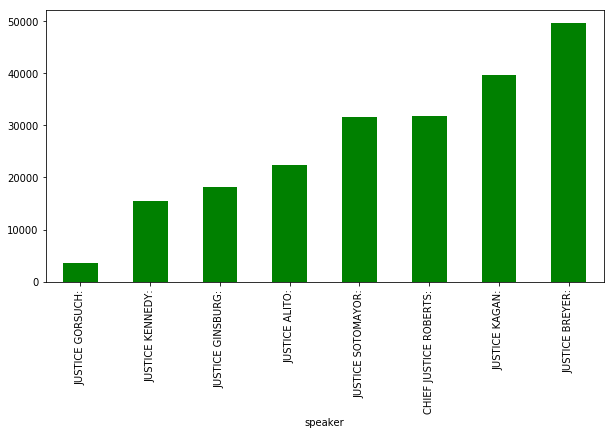

In [53]:
# plot it

ax = data_df.groupby('speaker').sum().sort_values(by = 'word_count').plot(kind = 'bar', figsize=(10,5), color='green', y = 'word_count', legend = False) 

# ax.set_title('SUPREME COURT JUSTICES WHO SPOKE THE MOST')


In [54]:
final_data = data_df.iloc[data_df.groupby(['docket_number']).apply(lambda x: x['word_count'].idxmax())]
final_data.head()

,docket_number,speaker,case_name,word_count
1,14-1055,JUSTICE BREYER:,Lightfoot v. Cendant Mortgage,1065
8,14-1538,JUSTICE BREYER:,Life Technologies Corp. v. Promega Corp.,722
17,14-9496,JUSTICE KAGAN:,Manuel v. Joliet,960
22,15-1031,JUSTICE BREYER:,Howell v. Howell,980
33,15-1039,JUSTICE SOTOMAYOR:,Sandoz Inc. v. Amgen Inc.,1256


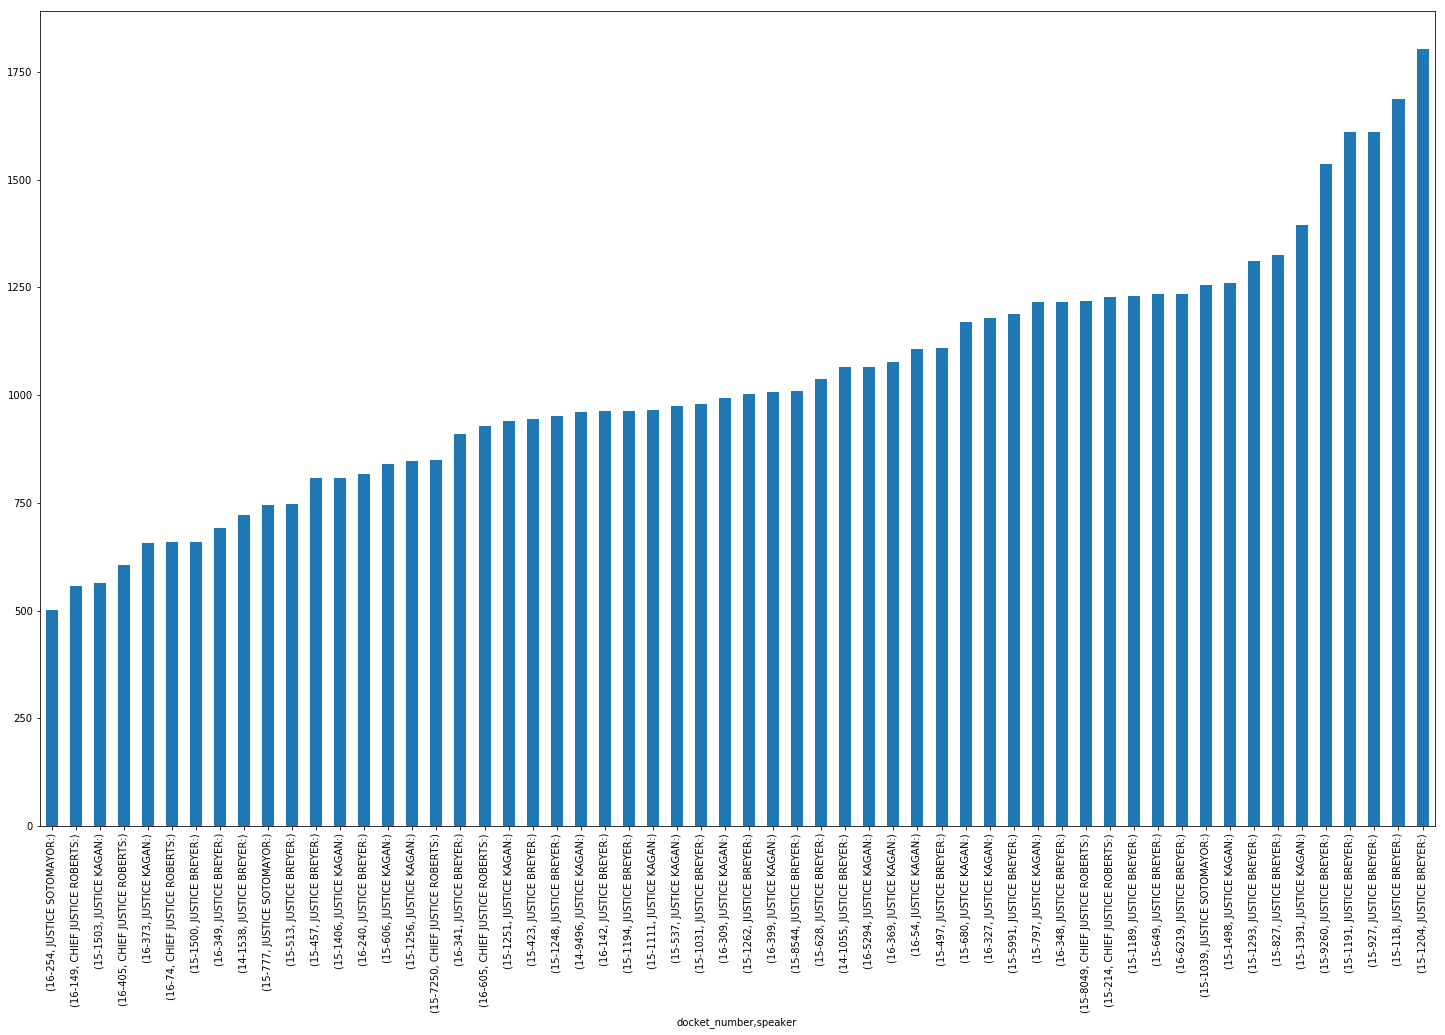

In [55]:

ax = final_data.groupby(['docket_number', 'speaker'])['word_count'].sum().sort_values(ascending=True).plot(kind = "bar", figsize=(25, 15), x = "speaker", y = "word_count", legend = False)


In [56]:
final_data.head()

,docket_number,speaker,case_name,word_count
1,14-1055,JUSTICE BREYER:,Lightfoot v. Cendant Mortgage,1065
8,14-1538,JUSTICE BREYER:,Life Technologies Corp. v. Promega Corp.,722
17,14-9496,JUSTICE KAGAN:,Manuel v. Joliet,960
22,15-1031,JUSTICE BREYER:,Howell v. Howell,980
33,15-1039,JUSTICE SOTOMAYOR:,Sandoz Inc. v. Amgen Inc.,1256


In [57]:
# final_data["string"] = final_data["speaker"] + " spoke the most in this case: " + final_data["case_name"]
# final_data.head()

In [58]:
final_data['speaker'].replace(r'\:', '', regex=True, inplace=True)
final_data

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,docket_number,speaker,case_name,word_count
1,14-1055,JUSTICE BREYER,Lightfoot v. Cendant Mortgage,1065
8,14-1538,JUSTICE BREYER,Life Technologies Corp. v. Promega Corp.,722
17,14-9496,JUSTICE KAGAN,Manuel v. Joliet,960
22,15-1031,JUSTICE BREYER,Howell v. Howell,980
33,15-1039,JUSTICE SOTOMAYOR,Sandoz Inc. v. Amgen Inc.,1256
37,15-1111,JUSTICE KAGAN,Bank of America Corp. v. Miami,966
42,15-118,JUSTICE BREYER,Hernandez v. Mesa,1686
49,15-1189,JUSTICE BREYER,"Impressions Products, Inc. v. Lexmark Int'l, Inc.",1230
54,15-1191,JUSTICE BREYER,Lynch v. Morales-Santana,1610
61,15-1194,JUSTICE BREYER,Packingham v. North Carolina,964


In [59]:
type(final_data)

pandas.core.frame.DataFrame

In [60]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [61]:
final_data = gpd.GeoDataFrame(final_data)

In [62]:
type(final_data)

geopandas.geodataframe.GeoDataFrame

In [63]:
geo_points = pd.read_csv('supreme_court_data.csv', )
geo_points = geo_points[['docket_number', "latitude", 'longitude', 'decision', 'previous_court', 'area']]
geo_points

,docket_number,latitude,longitude,decision,previous_court,area
0,14-1055,34.147785,-118.144516,8-0,United States Court of Appeals for the Ninth C...,economic activity
1,14-1538,43.073052,-89.401230,7-0,United States Court of Appeals for the Federal...,economic activity
2,14-9496,41.525031,-88.081725,6-2,United States Court of Appeals for the Seventh...,civil rights
3,15-118,29.424122,-98.493628,Per curiam,United States Court of Appeals for the Fifth C...,immigration
4,15-214,45.049784,-92.387569,5-3,Wisconsin Court Of Appeals District III,economic activity
5,15-423,38.907192,-77.036871,8-0,United States District Court for the District ...,economic activity
6,15-457,47.606209,-122.332071,8-0,United States Court of Appeals for the Ninth C...,economic activity
7,15-497,42.331427,-83.045754,8-0,United States Court of Appeals for the Sixth C...,civil rights
8,15-513,30.367420,-89.092816,8-0,United States Court of Appeals for the Fifth C...,economic activity
9,15-537,18.423850,-66.064879,8-0,United States Court of Appeals for the First C...,criminal procedure


In [64]:
final_data = final_data.merge(geo_points, left_on='docket_number', right_on='docket_number', how='outer')

In [65]:
final_data

,docket_number,speaker,case_name,word_count,latitude,longitude,decision,previous_court,area
0,14-1055,JUSTICE BREYER,Lightfoot v. Cendant Mortgage,1065,34.147785,-118.144516,8-0,United States Court of Appeals for the Ninth C...,economic activity
1,14-1538,JUSTICE BREYER,Life Technologies Corp. v. Promega Corp.,722,43.073052,-89.401230,7-0,United States Court of Appeals for the Federal...,economic activity
2,14-9496,JUSTICE KAGAN,Manuel v. Joliet,960,41.525031,-88.081725,6-2,United States Court of Appeals for the Seventh...,civil rights
3,15-1031,JUSTICE BREYER,Howell v. Howell,980,33.453821,-112.069434,8-0,Arizona Supreme Court\n,economic activity
4,15-1039,JUSTICE SOTOMAYOR,Sandoz Inc. v. Amgen Inc.,1256,34.170561,-118.837594,8-0,United States Court of Appeals for the Federal...,economic activity
5,15-1111,JUSTICE KAGAN,Bank of America Corp. v. Miami,966,25.761680,-80.191790,5-3,United States Court of Appeals for the Elevent...,economic activity
6,15-118,JUSTICE BREYER,Hernandez v. Mesa,1686,29.424122,-98.493628,Per curiam,United States Court of Appeals for the Fifth C...,immigration
7,15-1189,JUSTICE BREYER,"Impressions Products, Inc. v. Lexmark Int'l, Inc.",1230,41.878114,-87.629798,8-0,United States Court of Appeals for the Federal...,economic activity
8,15-1191,JUSTICE BREYER,Lynch v. Morales-Santana,1610,40.712784,-74.005941,7-1,United States Court of Appeals for the Second ...,immigration
9,15-1194,JUSTICE BREYER,Packingham v. North Carolina,964,35.994033,-78.898619,8-0,North Carolina Supreme Court\n,First Amendment


In [66]:
final_data['geometry'] = final_data.apply(lambda row: Point(row.longitude, row.latitude), axis=1)

In [67]:
type(final_data)

pandas.core.frame.DataFrame

In [68]:
final_data.loc[final_data['word_count'] > 0, 'color_value'] = '#5D2A25'
final_data.loc[final_data['word_count'] > 500, 'color_value'] = '#00E508'
final_data.loc[final_data['word_count'] > 1000, 'color_value'] = '#1F41FF'
final_data.loc[final_data['word_count'] > 1500, 'color_value'] = '#FF0000'

final_data

,docket_number,speaker,case_name,word_count,latitude,longitude,decision,previous_court,area,geometry,color_value
0,14-1055,JUSTICE BREYER,Lightfoot v. Cendant Mortgage,1065,34.147785,-118.144516,8-0,United States Court of Appeals for the Ninth C...,economic activity,POINT (-118.144516 34.147785),#1F41FF
1,14-1538,JUSTICE BREYER,Life Technologies Corp. v. Promega Corp.,722,43.073052,-89.401230,7-0,United States Court of Appeals for the Federal...,economic activity,POINT (-89.40123 43.073052),#00E508
2,14-9496,JUSTICE KAGAN,Manuel v. Joliet,960,41.525031,-88.081725,6-2,United States Court of Appeals for the Seventh...,civil rights,POINT (-88.08172500000001 41.525031),#00E508
3,15-1031,JUSTICE BREYER,Howell v. Howell,980,33.453821,-112.069434,8-0,Arizona Supreme Court\n,economic activity,POINT (-112.069434 33.453821),#00E508
4,15-1039,JUSTICE SOTOMAYOR,Sandoz Inc. v. Amgen Inc.,1256,34.170561,-118.837594,8-0,United States Court of Appeals for the Federal...,economic activity,POINT (-118.837594 34.170561),#1F41FF
5,15-1111,JUSTICE KAGAN,Bank of America Corp. v. Miami,966,25.761680,-80.191790,5-3,United States Court of Appeals for the Elevent...,economic activity,POINT (-80.19179 25.76168),#00E508
6,15-118,JUSTICE BREYER,Hernandez v. Mesa,1686,29.424122,-98.493628,Per curiam,United States Court of Appeals for the Fifth C...,immigration,POINT (-98.493628 29.424122),#FF0000
7,15-1189,JUSTICE BREYER,"Impressions Products, Inc. v. Lexmark Int'l, Inc.",1230,41.878114,-87.629798,8-0,United States Court of Appeals for the Federal...,economic activity,POINT (-87.62979799999999 41.878114),#1F41FF
8,15-1191,JUSTICE BREYER,Lynch v. Morales-Santana,1610,40.712784,-74.005941,7-1,United States Court of Appeals for the Second ...,immigration,POINT (-74.00594100000001 40.712784),#FF0000
9,15-1194,JUSTICE BREYER,Packingham v. North Carolina,964,35.994033,-78.898619,8-0,North Carolina Supreme Court\n,First Amendment,POINT (-78.898619 35.994033),#00E508


In [69]:
final_data = gpd.GeoDataFrame(final_data)
type(final_data)

geopandas.geodataframe.GeoDataFrame

In [70]:
# final_data.to_file('supreme_final_data.json', driver='GeoJSON')